# Predicción de calidad de vino con arboles de desición

## Pasos de la actividad

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.

In [598]:

pip install pandas seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [599]:
# importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [600]:
# Se cargan los datos del archivo 
df = pd.read_csv("./winequality-red.csv")

In [601]:
## se comprueban los datos faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Se realizan diagramas boxplot para cada columna para identificar valores atipicos

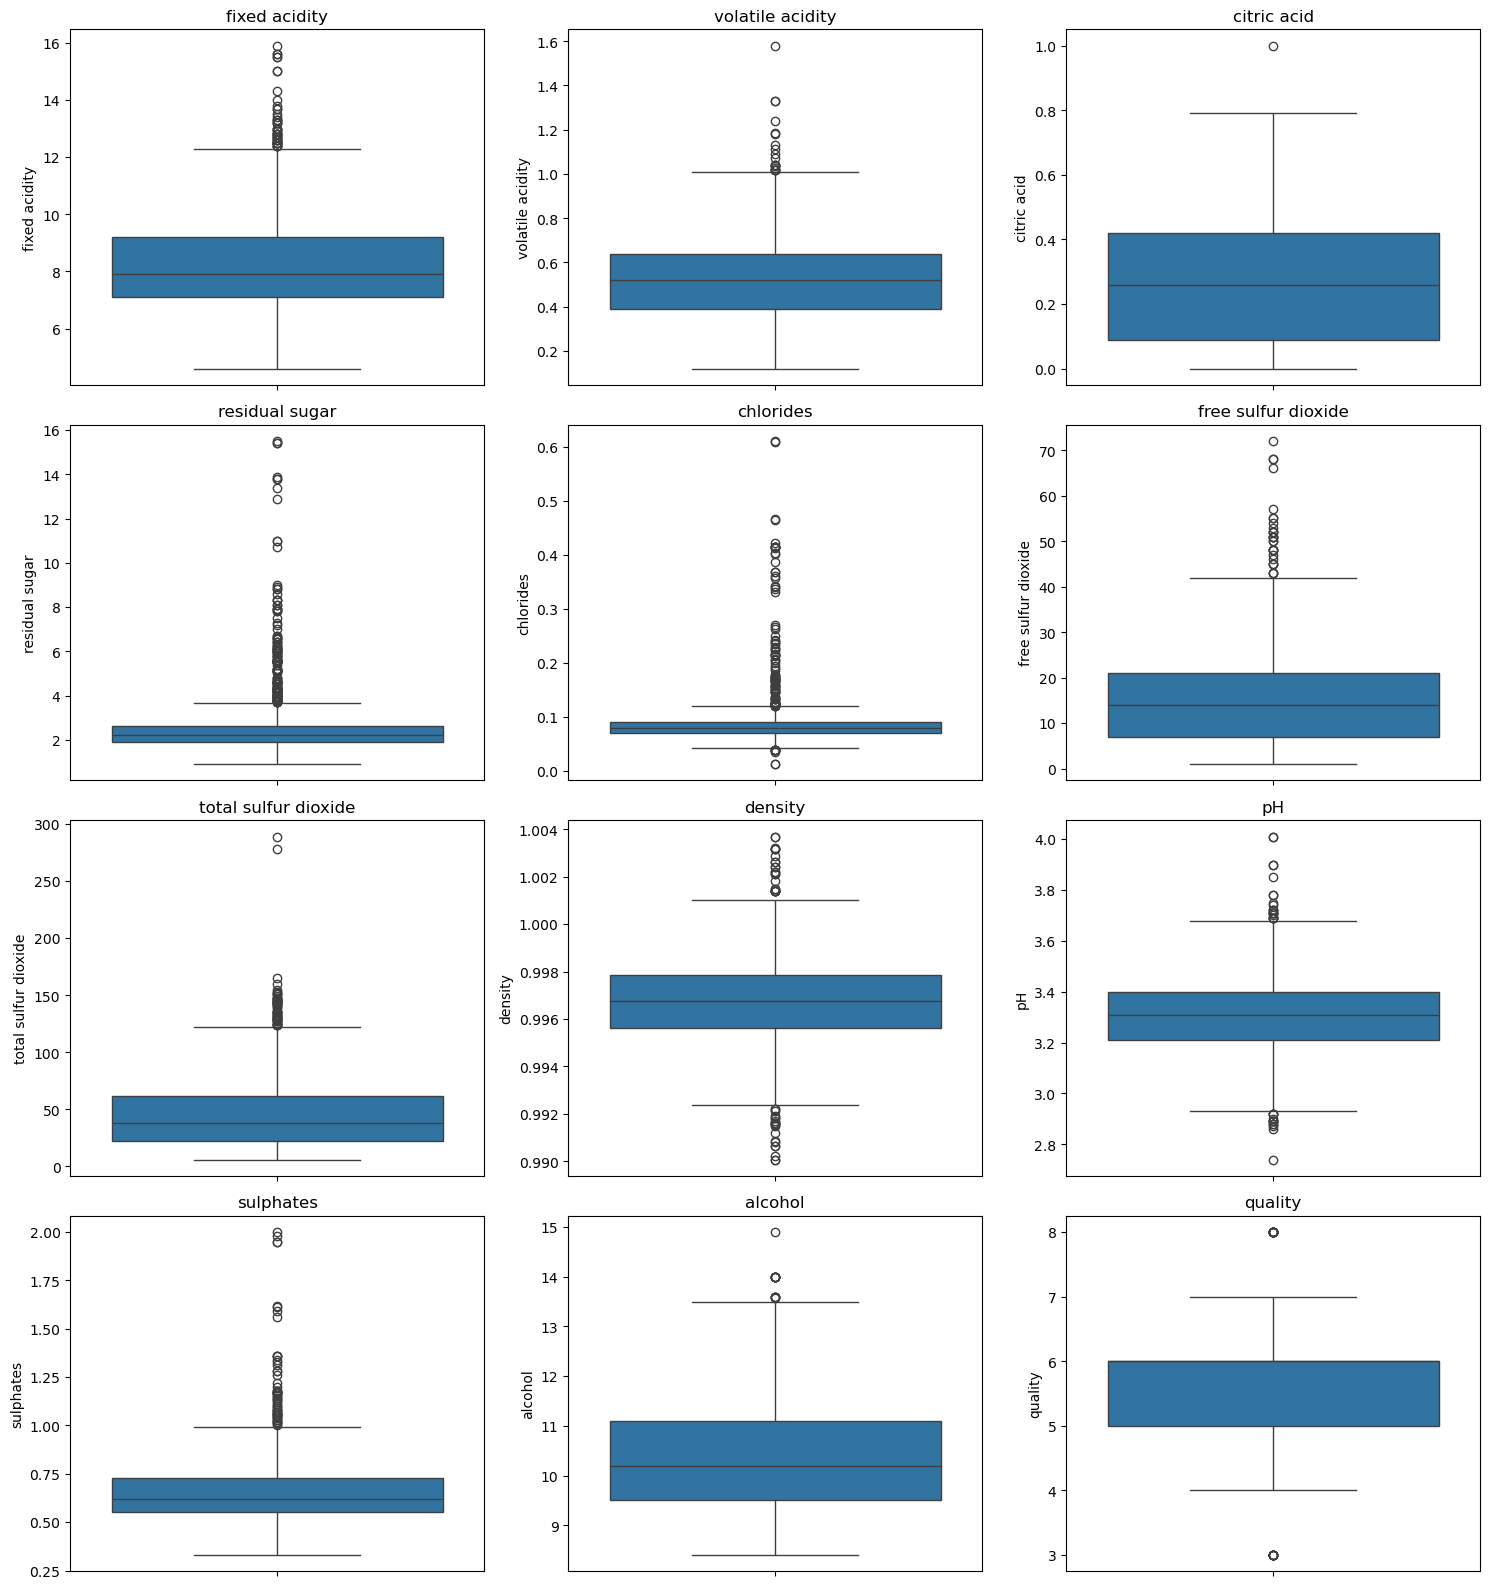

In [602]:
n_cols = 3 
n_rows = (len(df.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))


# Iterar sobre las columnas del DataFrame
for i, column in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.xlabel('')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()

In [603]:
# se revisa la cantidad de vinos por cada calidad
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

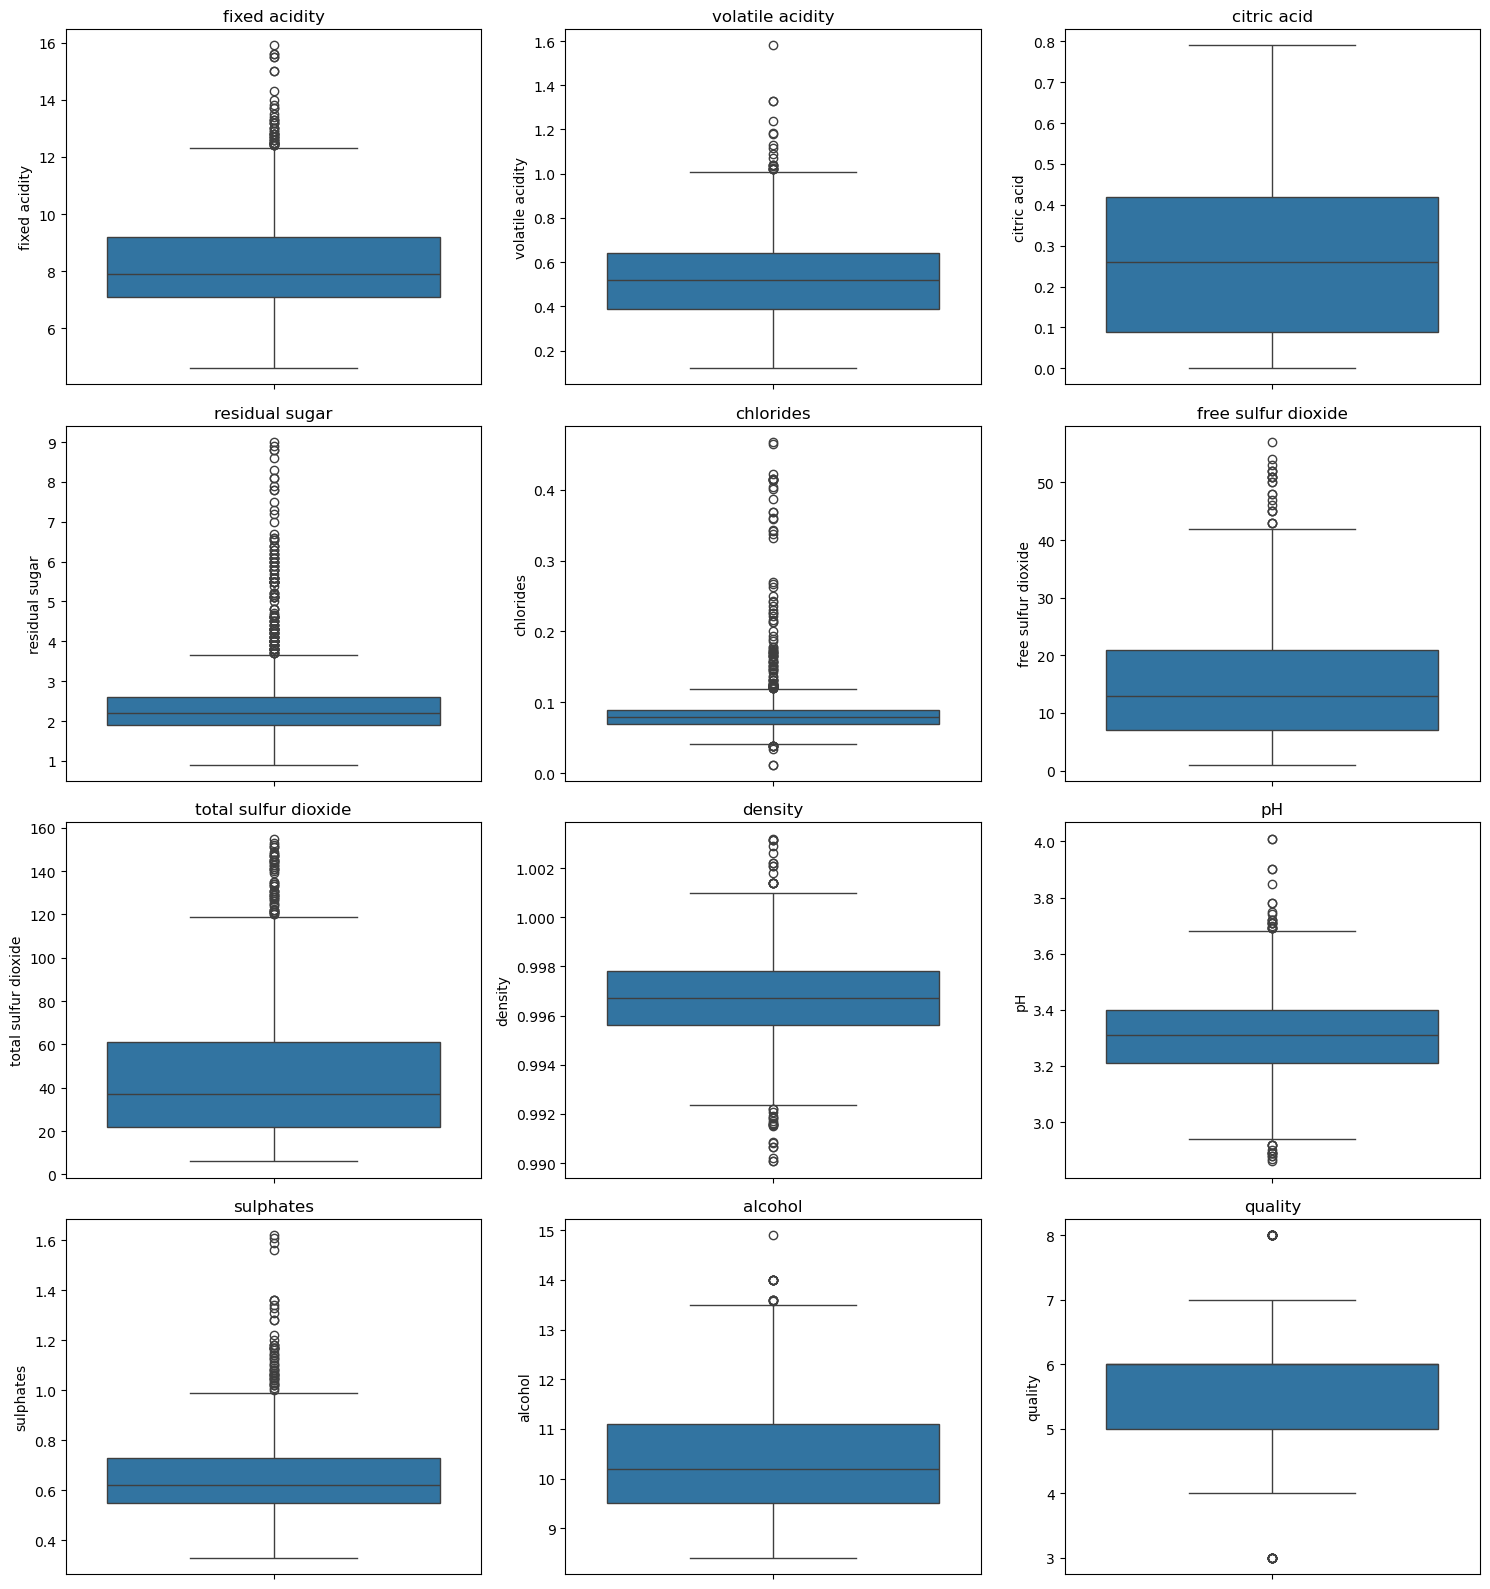

In [604]:
# Se visualizan 2 valores atipicos en la columna de total sulfulr dioxide por lo tanto se realiza el filtrado
df = df[(df["total sulfur dioxide"]<160)]
df = df[(df["free sulfur dioxide"]<65)]
df = df[(df["residual sugar"]<10)]
df = df[(df["chlorides"]<.5)]
df = df[(df["sulphates"]<1.75)]


n_cols = 3 
n_rows = (len(df.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))

# Iterar sobre las columnas del DataFrame
for i, column in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.xlabel('')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()

In [605]:
## Se revisa un resumen de los datos
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000
mean,8.321623,0.528725,0.269214,2.448478,0.086459,15.591947,45.506024,0.996721,3.313164,0.654933,10.429455,5.637286
std,1.742648,0.179360,0.193403,1.039295,0.042894,9.940964,31.177990,0.001845,0.152860,0.156178,1.064247,0.807848
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,13.000000,37.000000,0.996720,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997800,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,0.790000,9.000000,0.467000,57.000000,155.000000,1.003200,4.010000,1.620000,14.900000,8.000000


In [606]:
# se revisa la correlación de las variables con la calidad del vino
correlation_matrix = df.corr()

correlation_with_quality = correlation_matrix["quality"].sort_values(ascending=False)

correlation_with_quality



quality                 1.000000
alcohol                 0.477366
sulphates               0.290141
citric acid             0.232625
fixed acidity           0.125330
residual sugar          0.025189
free sulfur dioxide    -0.053127
pH                     -0.060581
chlorides              -0.116705
density                -0.172787
total sulfur dioxide   -0.210293
volatile acidity       -0.392498
Name: quality, dtype: float64

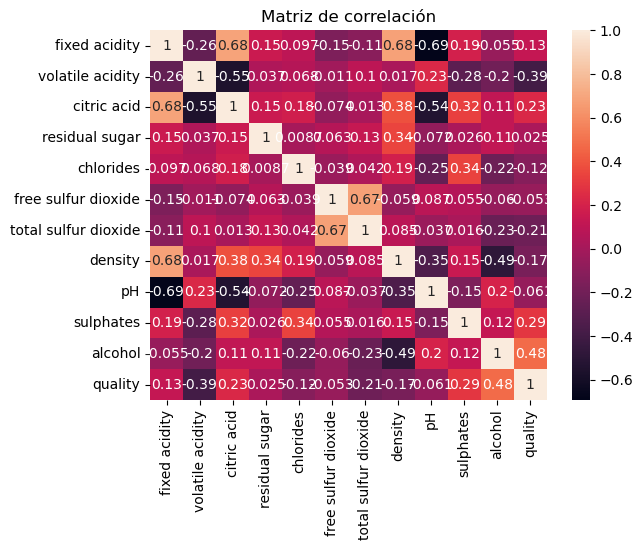

In [607]:
sns.heatmap(correlation_matrix, annot=True)
plt.title("Matriz de correlación")
plt.show()

### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [608]:
# se separa la columna objetivo y las demas que se usan para predecir el resultado

predictors = df.drop(columns=['quality'])  # DataFrame sin la columna 'quality'
target = df[['quality']]  # DataFrame solo con la columna 'quality'

### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [609]:
# se realiza la separacion de los datos para usar el 80% para entrenamiento y el 20% para pruebas
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=.2, random_state=13)

### 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [610]:
tree = DecisionTreeClassifier()
arbol = tree.fit(x_train, y_train)

### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.



In [611]:
# se realizan predicciones con el otro 20% de datos
predicciones = arbol.predict(x_test)

pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=["Predicciones"])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,2,0,0,0
4,0,1,4,1,2,0
5,0,3,100,36,5,0
6,2,0,30,86,8,0
7,0,0,1,11,18,1
8,0,0,0,3,1,1


In [612]:
## se generan las metricas para validar  el modelo
precision = precision_score(y_test, predicciones, average="weighted", zero_division="warn")
f1 = f1_score(y_test, predicciones, average="weighted")
recall = recall_score(y_test, predicciones, average="weighted")
data = {
    "Métrica": ["Precisión", "Recall", "F1 Score"],
    "Valor": [precision, recall, f1]
}

df_metricas = pd.DataFrame(data)
df_metricas

,Métrica,Valor
0,Precisión,0.649102
1,Recall,0.651899
2,F1 Score,0.648181


### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

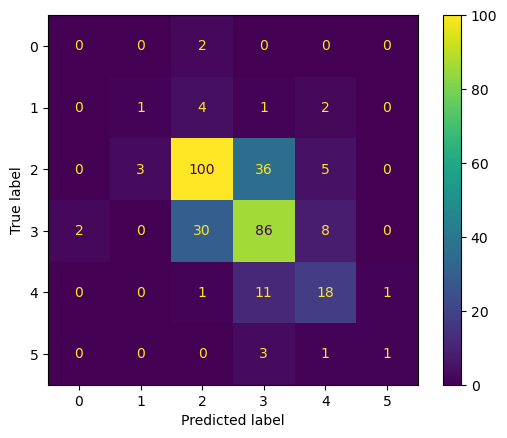

In [613]:
cm = confusion_matrix(y_test, predicciones)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

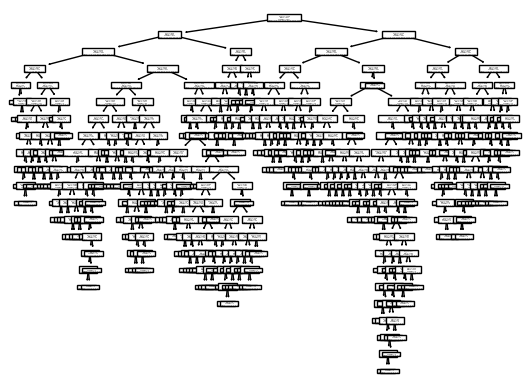

In [614]:
# se imprime el arbol generado
plot_tree(arbol)
plt.show()

### 8. Interpretar, analizar y documentar los resultados obtenidos.

Al realizar los boxplots de cada columna se pudo retirar algunos valores atipicos que mejoraron un poco la precision del modelo.

Inicialmente se indentifica que para mejorar la precision del modelo, se podría recolectar mayor información sobre vinos de calidad 8 y 3 ya que la mayoría se encuentran en los diferentes niveles de calidad, tener mas información información sobre vinos de calidad 8 y 3 podría facilitar la diferenciación de los parametros que definen la calidad del vino

La tabla generada mostrando la correlación entre los datos muestra que la calidad no depende unicamente de una caracteristica del vino, sino que es necesario usar varias caracteristicas. la caracteristica con mayor grado de correlación es el alcohol con un 47% pero no es suficientemente alto para decir que tiene que ver completamente con la calidad del vino

El bajo nivel de correlación con las variables y la calidad del vino y la baja cantidad de datos de calidad 8 y 3 es posiblemente lo que generó que el modelo tuviera un desempeño relativamente bajo de un 65%
 
